<a href="https://colab.research.google.com/github/Samyak-SS/meso4trial/blob/main/mesonet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout, Reshape, Concatenate, LeakyReLU
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model



In [17]:
#Lets create a dictionary to store image dim
#Height and width refer to the size of the image
# Channels refers to the amount of color channels (red, green, blue)

image_dimensions = {'height':256, 'width':256, 'channels':3}

In [5]:
#Create a Classifier class
class Classifier():
  def __init__():
    self.model = 0

  def predict(self,x):
    return self.model.predict(x)

  def fit(self,x,y):
    return self.model.train_on_batch(x,y)

  def get_accuracy(self, x, y):
    return self.model.test_on_batch(x,y)

  def load(self,path):
    self.model.load_weights(path)


In [28]:
from re import A
#CReate a MesoNet class using the classifier

class Meso4(Classifier):

#   The Meso4 class is setting up a machine learning model by:
# Initializing the model using init_model() (which you would define elsewhere).
# Setting up an optimizer (Adam) with a learning rate.
# Compiling the model with an optimizer, loss function, and performance metrics (accuracy).
# This class would typically be used for tasks like training a neural network model, evaluating its performance, and making predictions.


  def __init__(self, learning_rate = 0.001):
    # self.image_dimensions = image_dims
    self.model = self.init_model()
    optimizer = Adam(learning_rate  = learning_rate)
    self.model.compile(optimizer = optimizer, loss = 'mean_squared_error', metrics = ['accuracy'])

  #now lets create a network architecture
  def init_model(self):
    #first we create a input variable and assignt it to variable X
    x = Input(shape = (image_dimensions['height'],
                       image_dimensions['width'],
                       image_dimensions['channels']))

    #then we create our 4 convolutional blocks
    #Batch nomalization normalizizes  This layer normalizes the activations of the previous layer
    # It works by adjusting and scaling the activations of the neurons so that they maintain a consistent distribution during training.
    x1 = Conv2D(8, (3,3), padding='same', activation='relu')(x)
    x1 = BatchNormalization()(x1)
    x1 = MaxPooling2D(pool_size = (2,2), padding='same')(x1)

    x2 = Conv2D(8,(5,5), padding='same', activation = 'relu')(x1)
    x2 = BatchNormalization()(x2)
    x2 = MaxPooling2D(pool_size = (2,2), padding='same')(x2)

    x3 = Conv2D(8,(5,5), padding='same', activation = 'relu')(x2)
    x3 = BatchNormalization()(x3)
    x3 = MaxPooling2D(pool_size=(2,2), padding='same')(x3)

    x4 = Conv2D(8,(5,5), padding='same', activation = 'relu')(x3)
    x4 = BatchNormalization()(x4)
    x4 = MaxPooling2D(pool_size=(4,4), padding='same')(x4)


    y= Flatten()(x4)
    y = Dropout(0.5)(y)
    y = Dense(16)(y)
    y = LeakyReLU(alpha=0.1)(y)
    y = Dropout(0.5)(y)
    y = Dense(1, activation = 'sigmoid')(y)

    return Model(inputs =x, outputs = y)






In [26]:
!wget -O meso4_weights.h5 "https://raw.githubusercontent.com/kiteco/python-youtube-code/master/Deepfake-detection/weights/Meso4_DF"


--2025-01-27 19:48:08--  https://raw.githubusercontent.com/kiteco/python-youtube-code/master/Deepfake-detection/weights/Meso4_DF
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 156128 (152K) [application/octet-stream]
Saving to: ‘meso4_weights.h5’

meso4_weights.h5    100%[===================>] 152.47K  --.-KB/s    in 0.02s   

2025-01-27 19:48:08 (6.96 MB/s) - ‘meso4_weights.h5’ saved [156128/156128]



In [31]:
meso = Meso4()

# Step 3: Load the weights into the model
meso.model.load_weights('meso4_weights.h5', by_name=True)


# Step 4: (Optional) Verify successful loading or use the model
print("Weights loaded successfully!")

Weights loaded successfully!


In [34]:
!git init
!git remote add origin https://github.com/kiteco/python-youtube-code.git
!git config core.sparseCheckout true


hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/.git/


In [36]:
!echo "Deepfake-detection/data/*" >> .git/info/sparse-checkout


In [37]:
!git pull origin master


remote: Enumerating objects: 20239, done.
remote: Counting objects: 100% (173/173), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 20239 (delta 169), reused 167 (delta 167), pack-reused 20066 (from 1)
Receiving objects: 100% (20239/20239), 195.70 MiB | 32.72 MiB/s, done.
Resolving deltas: 100% (380/380), done.
From https://github.com/kiteco/python-youtube-code
 * branch              master     -> FETCH_HEAD
 * [new branch]        master     -> origin/master


In [39]:
# Correct path to the data folder
# Prepare image data

# Rescaling pixel values (between 1 and 255) to a range between 0 and 1
dataGenerator = ImageDataGenerator(rescale=1./255)
generator = dataGenerator.flow_from_directory(
    './Deepfake-detection/data/',  # Update this path if necessary
    target_size=(256, 256),
    batch_size=1,
    class_mode='binary'
)


Found 7104 images belonging to 2 classes.


In [40]:
# Checking class assignment
generator.class_indices

{'DeepFake': 0, 'Real': 1}

In [41]:
!rmdir /s /q python-youtube-code-master/Deepfake-detection/data/.ipynb_checkpoints


rmdir: failed to remove '/s': No such file or directory
rmdir: failed to remove '/q': No such file or directory
rmdir: failed to remove 'python-youtube-code-master/Deepfake-detection/data/.ipynb_checkpoints': No such file or directory


In [43]:
# Recreating generator after removing '.ipynb_checkpoints'
dataGenerator = ImageDataGenerator(rescale=1./255)

generator = dataGenerator.flow_from_directory(
    './Deepfake-detection/data/',
    target_size=(256, 256),
    batch_size=1,
    class_mode='binary')

# Re-checking class assignment after removing it
generator.class_indices

Found 7104 images belonging to 2 classes.


{'DeepFake': 0, 'Real': 1}

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted likelihood: 0.4571
Actual label: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

Correct prediction: False


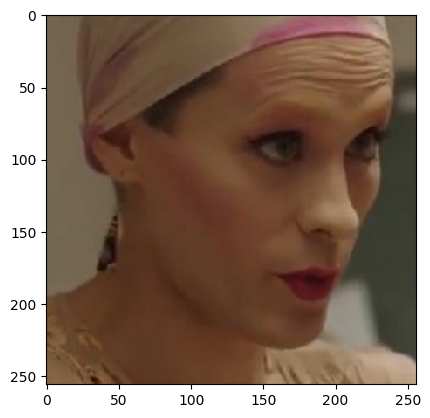

In [48]:
# Rendering image X with label y for MesoNet
X, y = next(generator) # Use next(generator) instead of generator.next()

# Evaluating prediction
print(f"Predicted likelihood: {meso.predict(X)[0][0]:.4f}")
print(f"Actual label: {int(y[0])}")
print(f"\nCorrect prediction: {round(meso.predict(X)[0][0])==y[0]}")

# Showing image
plt.imshow(np.squeeze(X));